#### Written Franklin (Koquiun) Li Lin 

## Livability & Affordability

In this notebook, you will get some insights on which suburbs are the most liveable and affordable in Victoria.
- Note: Make sure you had run the `livability` and `affordability` notebook in advance to get the related csv files.

### Import Libraries

In [40]:
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import FormatStrFormatter
import contextily as ctx

### Inspect datasets

In [41]:
liveable_count = pd.read_csv('../data/curated/liveable_count.csv')
liveable_count.head()

,sa2_name,independent_school_count,station_count,hospital_count,parkres_count,recreation_facilities_count,shopping_centres_count,extracted_price,crime_frequency,total_value_lost,total_items_lost,ERP_2021,crime_rate_per_1000,avg_cbd_distance_km,liveability_index
0,Caulfield - North,1.000000,0.875,0.666667,0.0000,0.052083,0.1,0.403594,1165.0,15116873.32,21260.0,22723.0,0.003671,0.177991,0.329992
1,Camberwell,0.555556,1.000,0.666667,0.0000,0.000000,0.1,0.453309,644.0,19190532.02,22268.0,21500.0,0.002145,0.211755,0.300698
2,Richmond - North,0.333333,0.625,0.833333,0.0250,0.783333,0.1,0.410520,1573.0,30116731.05,52839.0,14074.0,0.008004,0.067844,0.291447
3,Hawthorn East,0.666667,0.625,0.833333,0.0000,0.070833,0.0,0.405218,587.0,12070259.75,14360.0,15881.0,0.002647,0.176793,0.272899
4,Richmond (South) - Cremorne,0.555556,0.625,0.833333,0.0125,0.000000,0.0,0.478403,0.0,0.00,0.0,17977.0,0.000000,0.076838,0.270735


In [42]:
affordable_count = pd.read_csv('../data/curated/sa2_affordability_scores.csv')

# Rename a single column
affordable_count = affordable_count.rename(columns={'Affordability_Score': 'affordable_index'})

affordable_count.head()

,sa2_code,sa2_name,Median,extracted_price,ERP_2021,OCC_2021,population_density_persons_per_km2_2023,Gini coefficient,IPR,HPI,PDI,GII,affordable_index
0,209031210,Hurstbridge,57348.0,435.000000,7152.0,1.980000,237.8,0.440,1.000000,0.978410,0.097015,0.823188,0.795245
1,213051579,Manor Lakes - Quandong,60503.0,496.478261,744579.0,66.874434,166.6,0.392,0.896324,0.995038,0.138735,0.962319,0.781020
2,209041225,Whittlesea,54522.0,510.467742,667306.0,60.254972,47.1,0.434,0.739757,0.994995,0.492262,0.840580,0.776912
3,213051590,Wyndham Vale - South,53299.0,446.692308,178152.0,12.745648,2801.4,0.398,0.869859,0.996662,0.007682,0.944928,0.742971
4,213051468,Werribee - West,56515.0,497.649485,2201124.0,92.512976,220.5,0.398,0.810010,0.999286,0.104675,0.944928,0.739218


### Merge datasets

In [43]:
full_index = pd.merge(affordable_count, liveable_count, on='sa2_name', how='outer')

# Fill any NaN values with 0 for counting purposes
full_index.fillna(0, inplace=True)

full_index.head()

,sa2_code,sa2_name,Median,extracted_price_x,ERP_2021_x,OCC_2021,population_density_persons_per_km2_2023,Gini coefficient,IPR,HPI,...,recreation_facilities_count,shopping_centres_count,extracted_price_y,crime_frequency,total_value_lost,total_items_lost,ERP_2021_y,crime_rate_per_1000,avg_cbd_distance_km,liveability_index
0,206071139.0,Abbotsford,71394.0,699.903846,481416.0,44.603672,5750.1,0.440,0.689818,0.994786,...,0.0000,0.0,0.411708,677.0,10978545.92,18992.0,9258.0,0.005237,0.073584,0.185316
1,210011226.0,Airport West,62051.0,639.285714,173040.0,19.431258,2275.6,0.410,0.638423,0.993039,...,0.0000,0.1,0.376050,649.0,10353037.32,13692.0,8240.0,0.005640,0.245336,0.054380
2,206051128.0,Albert Park,73107.0,722.200000,720495.0,38.027925,3606.9,0.606,0.681736,0.998330,...,0.1375,0.0,0.424824,0.0,0.00,0.0,16011.0,0.000000,0.067781,0.144911
3,0.0,Alexandra,0.0,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,...,0.0000,0.0,0.000000,0.0,0.00,0.0,6771.0,0.000000,0.000000,0.000000
4,0.0,Alfredton,0.0,0.000000,0.0,0.000000,0.0,0.000,0.000000,0.000000,...,0.0000,0.0,0.000000,0.0,0.00,0.0,16841.0,0.000000,0.000000,0.000000


In [44]:
full_index.columns

Index(['sa2_code', 'sa2_name', 'Median', 'extracted_price_x', 'ERP_2021_x',
       'OCC_2021', 'population_density_persons_per_km2_2023',
       'Gini coefficient', 'IPR', 'HPI', 'PDI', 'GII', 'affordable_index',
       'independent_school_count', 'station_count', 'hospital_count',
       'parkres_count', 'recreation_facilities_count',
       'shopping_centres_count', 'extracted_price_y', 'crime_frequency',
       'total_value_lost', 'total_items_lost', 'ERP_2021_y',
       'crime_rate_per_1000', 'avg_cbd_distance_km', 'liveability_index'],
      dtype='object')

### Geospatial Analysis

In [45]:
# Read the shapefile using GeoPandas
vic_boundaries = gpd.read_file('../data/landing/boundaries/Victoria/vic_dist_boundaries.shp')

vic_boundaries.head(1)

,sa2_code,sa2_name,chg_flag,chg_lbl,sa3_code,sa3_name,sa4_code,sa4_name,gcc_code,gcc_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry
0,201011001,Alfredton,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,52.7109,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.78281 -37.56667, 143.75557 -37.5..."


In [46]:
metropolitan_victoria = pd.read_csv('../data/curated/metropolitan_victoria.csv')

# Reset the index, drop the old index, and set the new index to start from 1
metropolitan_victoria = metropolitan_victoria.reset_index(drop=True)
metropolitan_victoria.index = metropolitan_victoria.index + 1

metropolitan_victoria.head()

,sa2_name
1,Brunswick East
2,Brunswick West
3,Pascoe Vale South
4,Brunswick - North
5,Brunswick - South


### Plotting

In [47]:
def plot_map_with_colorbar(sf, column, ax, cmap_name='viridis', n_colors=8, title="", crs_string="", alpha=0.5, bounds=None):
    '''
    Plots a geospatial map with a discrete color bar.

    Parameters:
        sf: The GeoDataFrame containing the spatial data to be plotted
        column: The name of the column in `sf` to be visualized on the map
        ax: The matplotlib axis object on which the map will be plotted
        cmap_name: The name of the colormap to use (default is 'viridis')
        n_colors: The number of discrete colors in the colormap (default is 8)
        title: The title of the map (default is an empty string)
        crs_string: The Coordinate Reference System (CRS) as a string for adding the basemap (default is "")
        alpha: The transparency level for the map elements (default is 0.5)
        bounds: The boundaries for the color bar (default is None)

    Returns:
        ax: The axis object with the plotted map
        cbar: The color bar associated with the plot
    '''
    if bounds is None:
        bounds = np.linspace(sf[column].min(), sf[column].max(), n_colors + 1)
    
    cmap = plt.get_cmap(cmap_name, n_colors)
    norm = BoundaryNorm(bounds, cmap.N)

    im = sf.plot(column=column, ax=ax, legend=False, edgecolor='black', alpha=alpha, cmap=cmap, norm=norm)

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=crs_string, alpha=1, attribution=False)

    ax.set_title(title, weight="bold", fontsize=14)
    ax.set_xlabel("")  
    ax.set_ylabel("")  
    
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    cbar = plt.colorbar(im.collections[0], cax=cax, norm=norm, boundaries=bounds, ticks=bounds)
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    cbar.outline.set_linewidth(0)
    cbar.ax.tick_params(size=0)  

    return ax, cbar


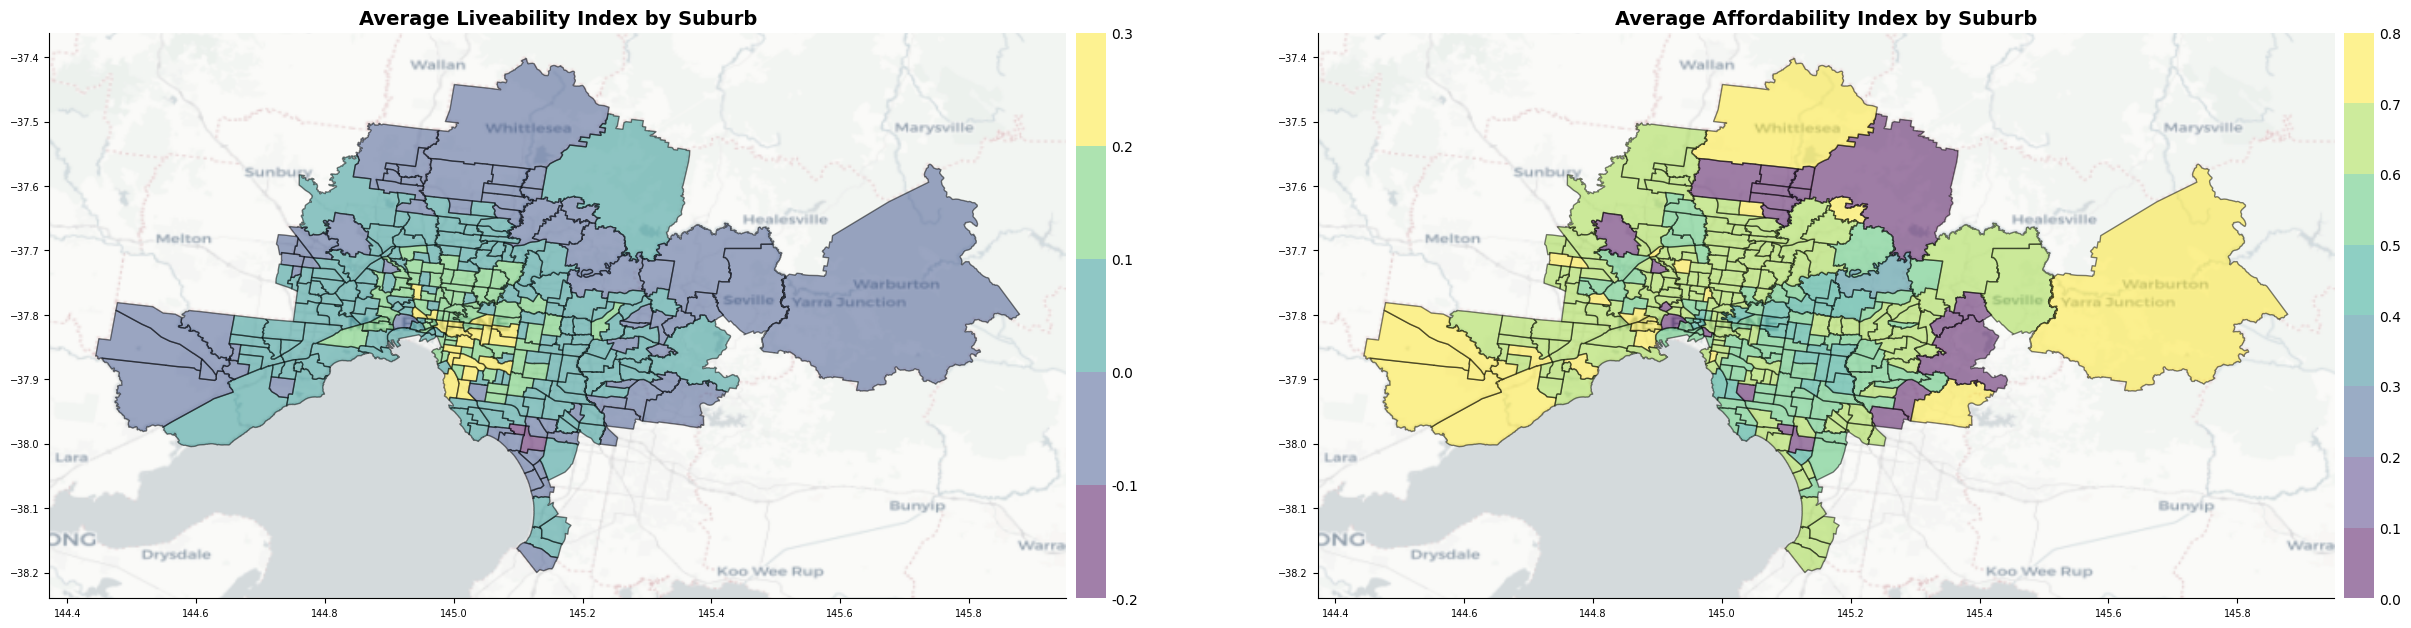

In [48]:
# Filter the vic_boundaries GeoDataFrame to include only areas in metropolitan_victoria
filtered_boundaries = vic_boundaries[vic_boundaries['sa2_name'].isin(metropolitan_victoria['sa2_name'])]

# Merge the filtered boundaries with your full index DataFrame using 'sa2_name'
merged_data = filtered_boundaries.merge(full_index, left_on='sa2_name', right_on='sa2_name')

# Remove rows where liveability_index or affordable_index is NaN
merged_data = merged_data.dropna(subset=['liveability_index', 'affordable_index'])

# Create subplots with increased width
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 30))  # Increased width and height

# Define the color scale boundaries for liveability_index
liveability_bounds = np.linspace(merged_data['liveability_index'].min(), merged_data['liveability_index'].max(), 6)
affordability_bounds = np.linspace(merged_data['affordable_index'].min(), merged_data['affordable_index'].max(), 9)

# Normalize the color mapping using BoundaryNorm
liveability_norm = BoundaryNorm(liveability_bounds, ncolors=256)
affordability_norm = BoundaryNorm(affordability_bounds, ncolors=256)

# Plot for liveability_index
ax1, cbar1 = plot_map_with_colorbar(
    merged_data,
    'liveability_index',
    ax1,
    cmap_name='viridis',
    n_colors=256,  # Use more colors for smoother gradients
    title="Average Liveability Index by Suburb",
    crs_string=merged_data.crs.to_string(),
    bounds=liveability_bounds  # Use the defined bounds
)

# Plot for affordable_index
ax2, cbar2 = plot_map_with_colorbar(
    merged_data,
    'affordable_index',
    ax2,
    cmap_name='viridis',
    n_colors=256,  # Use more colors for smoother gradients
    title="Average Affordability Index by Suburb",
    crs_string=merged_data.crs.to_string(),
    bounds=affordability_bounds  # Use the defined bounds
)

# Adjust layout
# plt.tight_layout()

# Save the plot directory
save_dir = '../plots'
os.makedirs(save_dir, exist_ok=True)

# File paths for the two images
transparent_file_path = os.path.join(save_dir, 'avg_liveability_affordability_metropolitan_plot_transparent.png')
solid_file_path = os.path.join(save_dir, 'avg_liveability_affordability_metropolitan_plot_solid.png')

# Save the plot with a transparent background
plt.savefig(transparent_file_path, transparent=True, dpi=300, bbox_inches='tight')

# Save the plot with a solid background
plt.savefig(solid_file_path, transparent=False, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


#### Get each metric separately

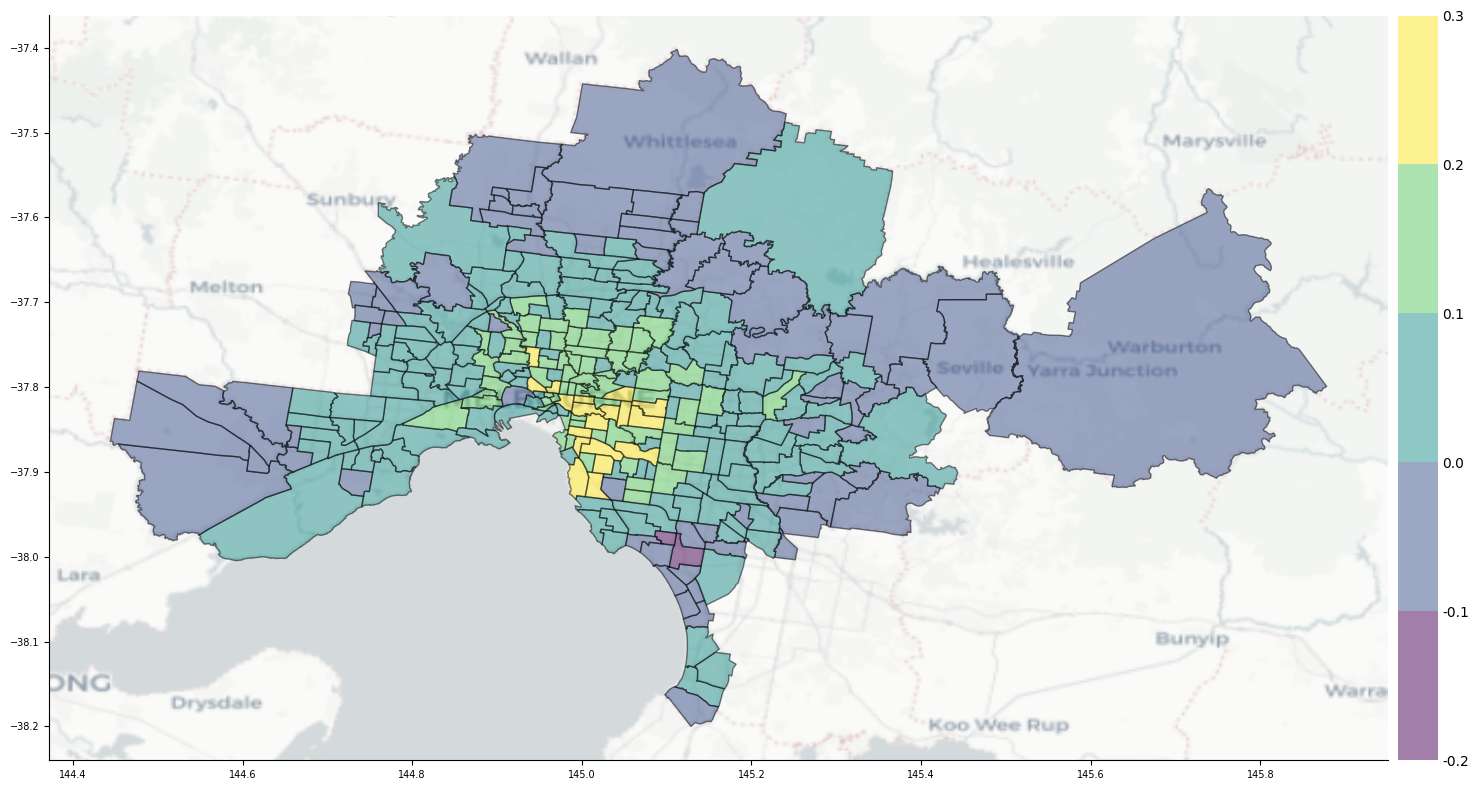

In [49]:
# Filter the vic_boundaries GeoDataFrame to include only areas in metropolitan_victoria
filtered_boundaries = vic_boundaries[vic_boundaries['sa2_name'].isin(metropolitan_victoria['sa2_name'])]

# Merge the filtered boundaries with your full index DataFrame using 'sa2_name'
merged_data = filtered_boundaries.merge(full_index, left_on='sa2_name', right_on='sa2_name')

# Remove rows where liveability_index or affordable_index is NaN
merged_data = merged_data.dropna(subset=['liveability_index', 'affordable_index'])

# Create a plot for liveability_index
fig, ax1 = plt.subplots(figsize=(15, 8))  # Increased width

# Define the color scale boundaries for liveability_index
liveability_bounds = np.linspace(merged_data['liveability_index'].min(), merged_data['liveability_index'].max(), 6)

# Normalize the color mapping using BoundaryNorm
liveability_norm = BoundaryNorm(liveability_bounds, ncolors=256)

# Plot for liveability_index
ax1, cbar1 = plot_map_with_colorbar(
    merged_data,
    'liveability_index',
    ax1,
    cmap_name='viridis',
    n_colors=256,  # Use more colors for smoother gradients
    #title="Average Liveability Index by SA2 Name",
    crs_string=merged_data.crs.to_string(),
    bounds=liveability_bounds  # Use the defined bounds
)

# Adjust layout
plt.tight_layout()

# Save the plot for liveability index
save_dir = '../plots'
os.makedirs(save_dir, exist_ok=True)
file_path = os.path.join(save_dir, 'avg_liveability_metropolitan_plot.png')
plt.savefig(file_path, transparent=True, dpi=300, bbox_inches='tight')

# Show the plot for liveability index
plt.show()

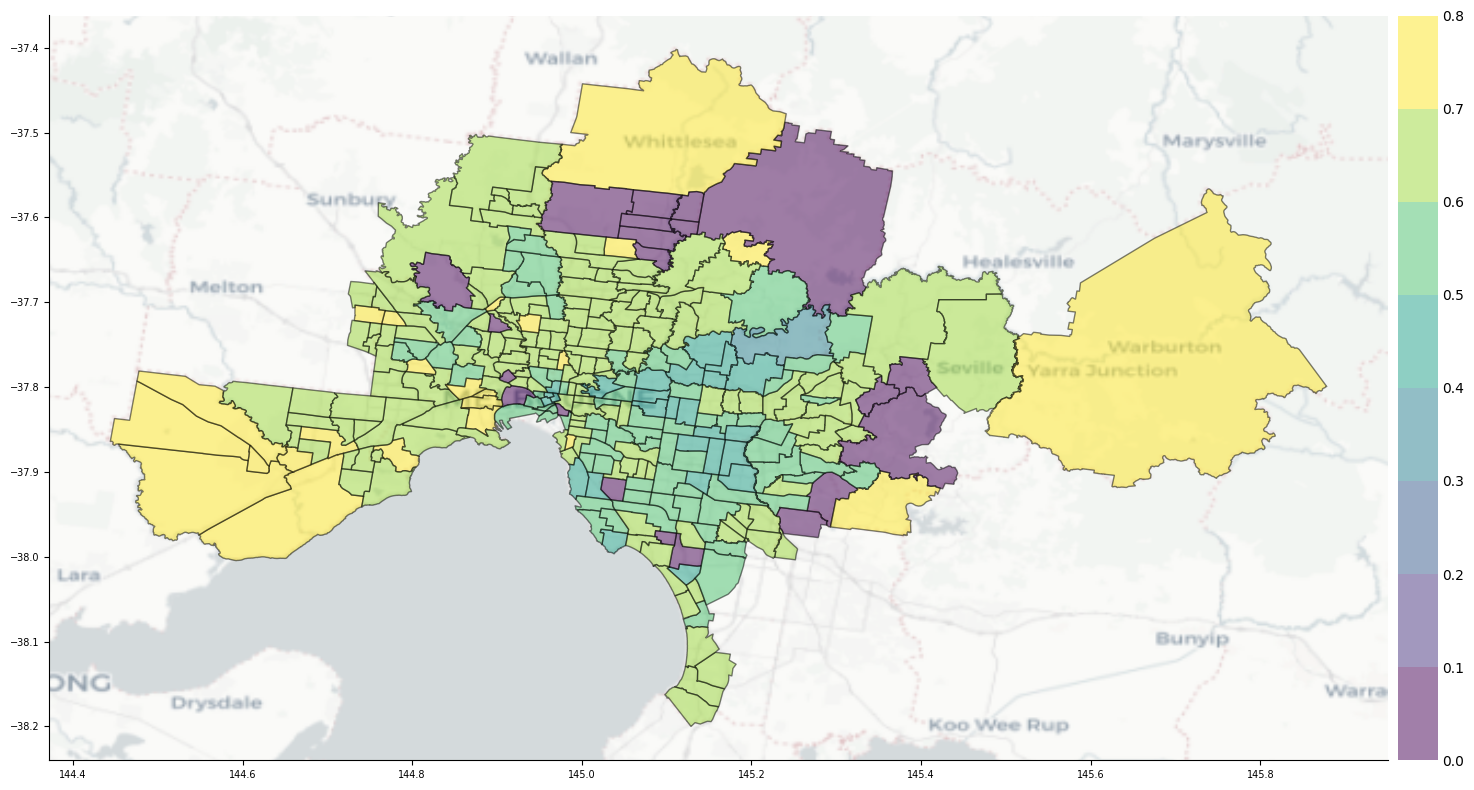

In [50]:
# Create a plot for affordability_index
fig, ax2 = plt.subplots(figsize=(15, 8))  # Increased width

# Define the color scale boundaries for affordability_index
affordability_bounds = np.linspace(merged_data['affordable_index'].min(), merged_data['affordable_index'].max(), 9)

# Normalize the color mapping using BoundaryNorm
affordability_norm = BoundaryNorm(affordability_bounds, ncolors=256)

# Plot for affordable_index
ax2, cbar2 = plot_map_with_colorbar(
    merged_data,
    'affordable_index',
    ax2,
    cmap_name='viridis',
    n_colors=256,  # Use more colors for smoother gradients
    #title="Average Affordability Index by SA2 Name",
    crs_string=merged_data.crs.to_string(),
    bounds=affordability_bounds  # Use the defined bounds
)

# Adjust layout
plt.tight_layout()

# Save the plot for affordability index
file_path = os.path.join(save_dir, 'avg_affordability_metropolitan_plot.png')
plt.savefig(file_path, transparent=True, dpi=300, bbox_inches='tight')

# Show the plot for affordability index
plt.show()

### Livability & Affordability Metric

In [51]:
#calculate the liveability and affordability of suburb
full_index['index'] = full_index['affordable_index'] * 0.4 + full_index['liveability_index'] * 0.6

#sort index
full_index = full_index.sort_values(by='index',ascending=False)
full_index = full_index[['sa2_name','index']]

full_index.head(10)

,sa2_name,index
380,Prahran - Windsor,0.436356
390,Richmond - North,0.434545
93,Caulfield - North,0.432982
218,Hawthorn - South,0.422495
66,Brunswick West,0.422399
389,Richmond (South) - Cremorne,0.420241
219,Hawthorn East,0.411208
158,East Melbourne,0.408245
347,North Melbourne,0.399364
440,St Kilda East,0.397182


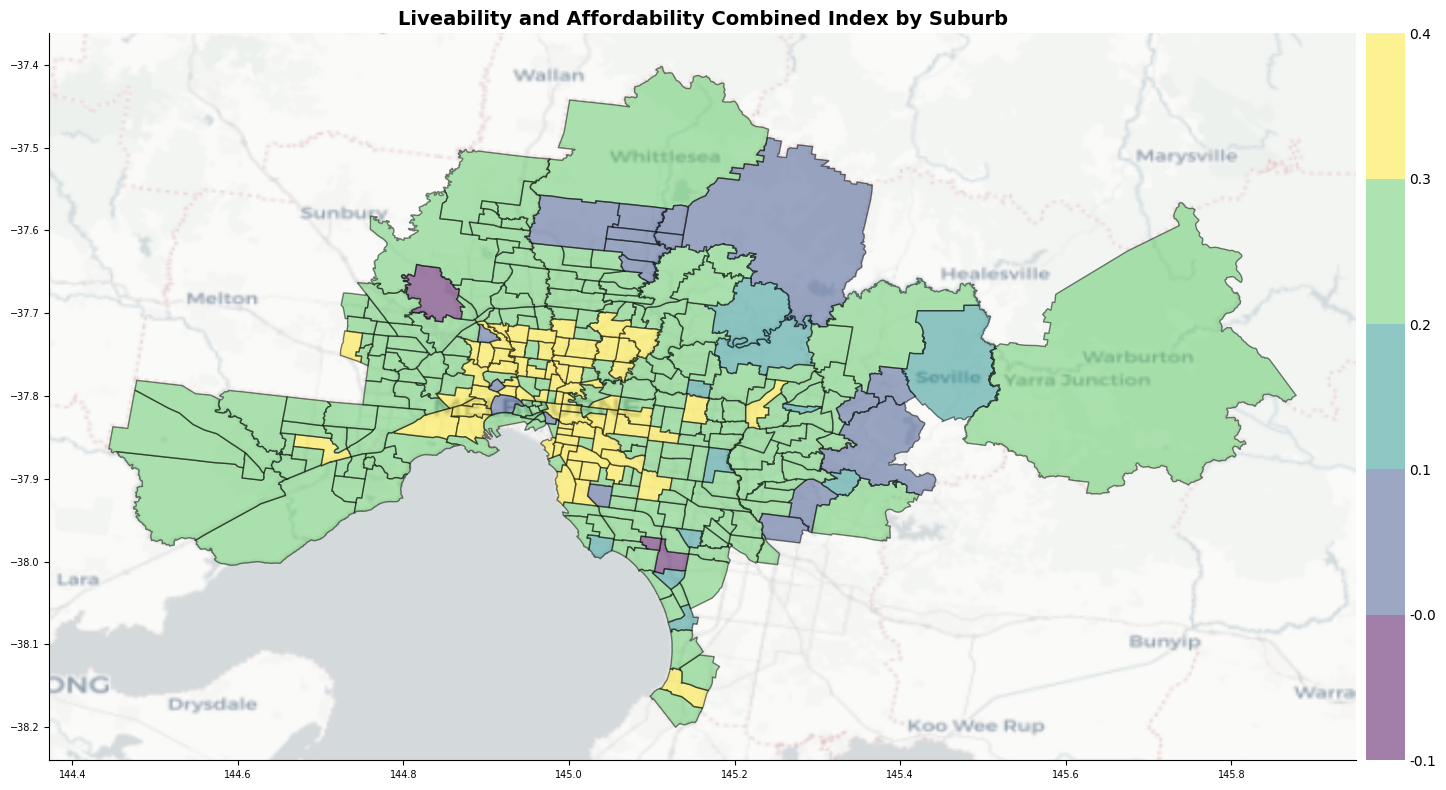

In [52]:
# Filter the vic_boundaries GeoDataFrame to include only areas in metropolitan_victoria
filtered_boundaries = vic_boundaries[vic_boundaries['sa2_name'].isin(metropolitan_victoria['sa2_name'])]

# Merge with the full index DataFrame
merged_index = filtered_boundaries.merge(full_index, left_on='sa2_name', right_on='sa2_name')

# Remove rows where the combined index is NaN
merged_index = merged_index.dropna(subset=['index'])

# Create a plot for the combined index
fig, ax2 = plt.subplots(figsize=(15, 8))  # Increased width

# Define the color scale boundaries for the combined index
index_bounds = np.linspace(merged_index['index'].min(), merged_index['index'].max(), 6)

# Normalize the color mapping using BoundaryNorm
index_norm = BoundaryNorm(index_bounds, ncolors=256)

# Plot for combined index
ax2, cbar2 = plot_map_with_colorbar(
    merged_index,
    'index',
    ax2,
    cmap_name='viridis',
    n_colors=256,  # Use more colors for smoother gradients
    title="Liveability and Affordability Combined Index by Suburb",
    crs_string=merged_index.crs.to_string(),
    bounds=index_bounds  # Use the defined bounds
)

# Adjust layout
plt.tight_layout()

# Save the plot directory
save_dir = '../plots'
os.makedirs(save_dir, exist_ok=True)

# File paths for the two images
transparent_file_path = os.path.join(save_dir, 'combined_index_metropolitan_plot_transparent.png')
solid_file_path = os.path.join(save_dir, 'combined_index_metropolitan_plot_solid.png')

# Save the plot with a transparent background
plt.savefig(transparent_file_path, transparent=True, dpi=300, bbox_inches='tight')

# Save the plot with a solid background
plt.savefig(solid_file_path, transparent=False, dpi=300, bbox_inches='tight')

# Show the plot for combined index
plt.show()